# Проектная работа по модулю Математика и статистика в Python

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**1. Загрузить файл hr.csv.**

In [2]:
data = pd.read_csv('Desktop/HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [3]:
statistics = data.describe()

In [4]:
mode = data.mode(axis = 0, dropna = True)

In [5]:
statistics.append(pd.Series(mode.iloc[0], name = 'mode'))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,low,sales


**3. Рассчитать и визуализировать корреляционную матрицу для переменных.**

In [6]:
data['salary_level'] = pd.factorize(data['salary'])[0]

In [7]:
data['department_code'] = pd.factorize(data['sales'])[0]

Корреляционная матрица исходной таблицы:


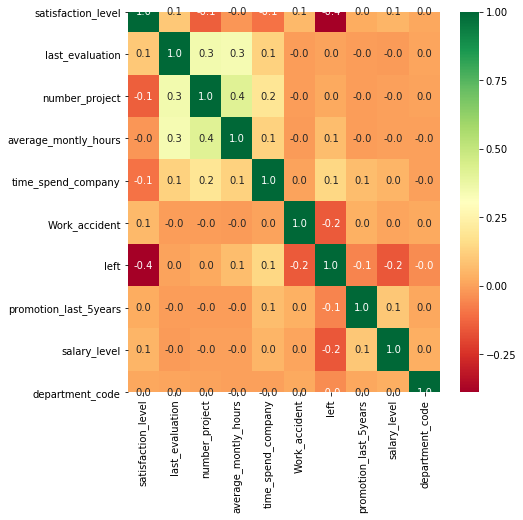

In [8]:
print('Корреляционная матрица исходной таблицы:')
sns.heatmap(data.corr(),annot=True, fmt = '.1f',cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

**4. Визуализировать несколько взаимосвязей между переменными.**

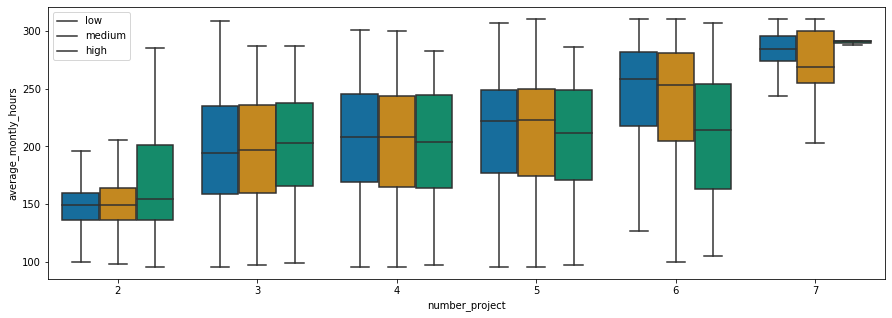

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(y=data['average_montly_hours'], 
            x=data['number_project'], 
            hue=data['salary_level'],
            palette="colorblind", showfliers=False)
plt.legend(['low', 'medium', 'high'])

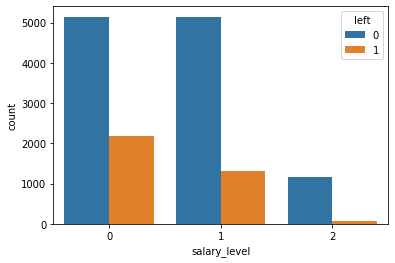

In [10]:
sns.countplot(x="salary_level", hue="left", data=data)

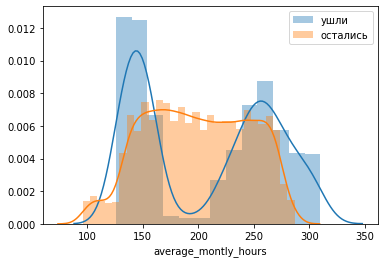

In [11]:
sns.distplot(data[data['left'] == 1]['average_montly_hours'])
sns.distplot(data[data['left'] == 0]['average_montly_hours'])
plt.legend(['ушли', 'остались'])

**5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [12]:
left = data[data['left']==1]['average_montly_hours']
stats.ttest_1samp(left, data['average_montly_hours'].mean())

Ttest_1sampResult(statistic=6.218506380185923, pvalue=5.598760530139529e-10)

**6. Рассчитать сколько работников работает в каждом департаменте.**

In [13]:
data.groupby(['sales']).size()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

**7. Показать распределение сотрудников по зарплатам.**

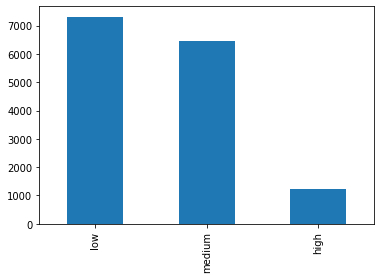

In [14]:
data['salary'].value_counts().plot(kind='bar')

**8. Показать распределение сотрудников по зарплатам совместно с департаментами.**

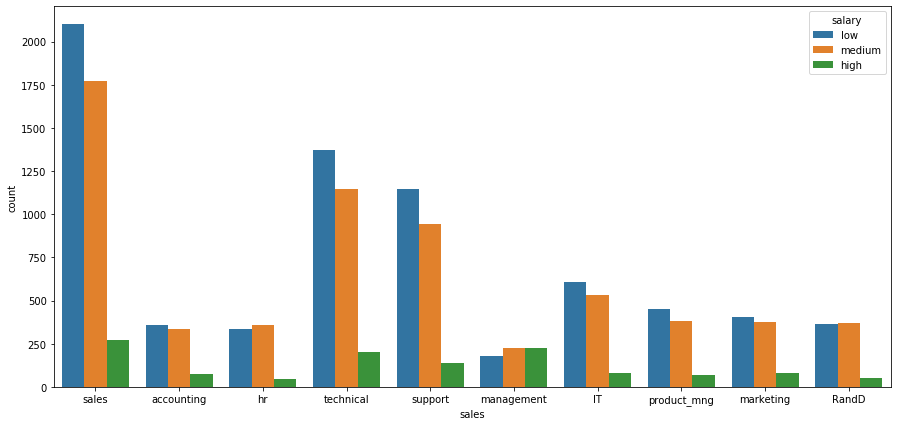

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x="sales", hue="salary", data=data)

**9. Сколько сотрудников покинули компанию.**

In [16]:
print('Кол-во сотрудников, покинувших компанию:', len(data[data['left'] == 1]))
print('Кол-во сотрудников, покинувших компанию в %:', (len(data[data['left'] == 1]) / len(data['left']))*100)

Кол-во сотрудников, покинувших компанию: 3571
Кол-во сотрудников, покинувших компанию в %: 23.80825388359224


**10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

In [17]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_level,department_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0


**Шаги проверки статистических гипотез следующие:**

*   формулируется основная гипотеза H0 и альтернативная гипотеза H1;
*   выбирается статистический критерий, с помощью которого будет проверяться гипотеза;
*   задаётся значение уровня значимости α;
*   находятся границы области принятия гипотезы;
*   делается вывод о принятии или отвержении основной гипотезы H0.

**Гипотеза №1: уровень зарплаты объясняет почему сотрудники покидают компанию**

In [18]:
#ANOVA test

low_salary = data[data['salary_level']==0]['left']

medium_salary = data[data['salary_level']==1]['left']

high_salary = data[data['salary_level']==2]['left']

stats.f_oneway(low_salary, medium_salary, high_salary)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

**Вывод: отвергаем нулевую гипотезу о том, что зарплата не влияет на решение сотрудника об уходе**

**Гипотеза №2: кол-во рабочих часов объясняет почему сотрудники покидают компанию**

In [19]:
stay = data[data['left']==0]['average_montly_hours']

leave = data[data['left']==1]['average_montly_hours']

stats.ttest_ind(stay, leave)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)

**Вывод: отвергаем нулевую гипотезу о том, что уровень рабочих часов не влияет на решение сотрудника об уходе**

**Гипотеза №3: уровень удовлетворения работой у ушедших сотрудников в среднем ниже**

In [39]:
leave = data[data['left']==1]['satisfaction_level']
stats.ttest_1samp(leave, data['satisfaction_level'].mean())

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

**Вывод: отвергаем нулевую гипотезу о том, что удовлетворенность работой не влияет на решение сотрудника об уходе**

**Строим логистическую регрессию:**

In [28]:
X = data.drop(['left', 'sales', 'salary'], axis = 1)
y = data.left

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [34]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      3429
           1       0.60      0.37      0.46      1071

    accuracy                           0.79      4500
   macro avg       0.71      0.65      0.66      4500
weighted avg       0.77      0.79      0.77      4500



**11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете**